In [13]:
import numpy as np
import os


input_dir = '/data/disk1/share/mnardon/nextmagDATA/DATASETS/lego/seq1_ALL'

# Load the data
list_of_files = os.listdir(input_dir)
npy_files = [f for f in list_of_files if f.endswith('.npy')]
npy_files.sort()
print(npy_files[:2])

depth_images = [f for f in list_of_files if f.endswith('.png') and f.startswith('depth')]
depth_images.sort()


['depth0_0.npy', 'depth0_1.npy']


In [14]:
first_npy = np.load(os.path.join(input_dir, npy_files[1]))
print(f'{first_npy.shape}') 
print(f'Min: {np.min(first_npy)}, Max: {np.max(first_npy)}')
print(f'Mean: {np.mean(first_npy)}, Std: {np.std(first_npy)}')
print(f'Median: {np.median(first_npy)}')
print(f'{first_npy[400:410,400:410]}')

(720, 1280)
Min: 0, Max: 20953
Mean: 746.7435481770833, Std: 407.89172695008193
Median: 704.0
[[702 703 703 703 703 702 702 702 702 701]
 [701 701 701 701 701 701 701 701 701 700]
 [700 700 700 700 700 700 700 700 700 699]
 [699 699 699 699 699 699 699 699 698 698]
 [698 698 698 698 698 698 698 698 697 697]
 [696 696 696 696 696 696 696 696 696 696]
 [694 694 695 695 695 695 695 695 695 695]
 [692 693 693 693 693 693 693 693 693 693]
 [691 691 691 691 692 692 692 692 692 692]
 [689 689 690 690 690 690 690 690 690 690]]


Depth maps (annotated and raw Velodyne scans) are saved as uint16 PNG images, which can be opened with either MATLAB, libpng++ or the latest version of Python's pillow (from PIL import Image). A 0 value indicates an invalid pixel (ie, no ground truth exists, or the estimation algorithm didn't produce an estimate for that pixel). Otherwise, the depth for a pixel can be computed in meters by converting the uint16 value to float and dividing it by 256.0:

In [4]:
disp(u,v)  = ((float)I(u,v))/256.0;
valid(u,v) = I(u,v)>0;

In [17]:
import numpy as np
import os
import png

def save_depth_image_as_uint16(depth_data_mm, output_depth_dir, depth_image_file_name):
    """
    Converts a depth map in millimeters to a uint16 PNG image and saves it.
    The depth values in millimeters are first converted to meters, and then scaled by 256.0 before saving.

    Parameters:
    - depth_data_mm: np.array, the input depth map with float32 values in millimeters.
    - output_depth_dir: str, the directory where the output image should be saved.
    - depth_image_file_name: str, the name of the output PNG file.

    Returns:
    - None
    """
    # Convert millimeters to meters and then scale by 256
    depth_image = (depth_data_mm / 1000.0 * 256.0).astype(np.uint16)
    
    # Construct the file path
    file_path = os.path.join(output_depth_dir, depth_image_file_name)
    
    # Save the uint16 image using pypng
    with open(file_path, 'wb') as f:
        writer = png.Writer(width=depth_image.shape[1],
                            height=depth_image.shape[0],
                            bitdepth=16,
                            greyscale=True)
        writer.write(f, depth_image)

# Example usage:
# save_depth_image_as_uint16(depth_data_mm, '/path/to/output', 'depth_image.png')


In [18]:
save_depth_image_as_uint16(first_npy, 'tmp', 'depth_image.png')

(720, 1280)
Min: 0, Max: 4457
Mean: 752.9771310763889, Std: 403.66393861547436
Median: 722.0
[[702 702 703 703 704 705 705 705 706 706]
 [701 701 702 703 704 704 705 705 705 705]
 [700 701 701 702 703 704 704 704 705 704]
 [699 700 700 701 702 703 703 703 703 703]
 [698 698 699 700 701 701 701 702 702 702]
 [696 697 698 698 699 700 700 700 700 700]
 [695 696 696 697 698 698 699 699 699 698]
 [694 694 695 695 696 696 697 697 697 697]
 [692 692 693 694 694 695 695 695 695 695]
 [691 691 691 692 692 692 692 692 692 693]]


(720, 1280)
Min: 0.0, Max: 20.94921875
Mean: 0.7450427412986755, Std: 0.4074680209159851
Median: 0.703125
[[0.69921875 0.69921875 0.69921875 0.69921875 0.69921875 0.69921875
  0.69921875 0.69921875 0.69921875 0.69921875]
 [0.69921875 0.69921875 0.69921875 0.69921875 0.69921875 0.69921875
  0.69921875 0.69921875 0.69921875 0.69921875]
 [0.69921875 0.69921875 0.69921875 0.69921875 0.69921875 0.69921875
  0.69921875 0.69921875 0.69921875 0.6953125 ]
 [0.6953125  0.6953125  0.6953125  0.6953125  0.6953125  0.6953125
  0.6953125  0.6953125  0.6953125  0.6953125 ]
 [0.6953125  0.6953125  0.6953125  0.6953125  0.6953125  0.6953125
  0.6953125  0.6953125  0.6953125  0.6953125 ]
 [0.6953125  0.6953125  0.6953125  0.6953125  0.6953125  0.6953125
  0.6953125  0.6953125  0.6953125  0.6953125 ]
 [0.69140625 0.69140625 0.69140625 0.69140625 0.69140625 0.69140625
  0.69140625 0.69140625 0.69140625 0.69140625]
 [0.69140625 0.69140625 0.69140625 0.69140625 0.69140625 0.69140625
  0.69140625 0.69140625 

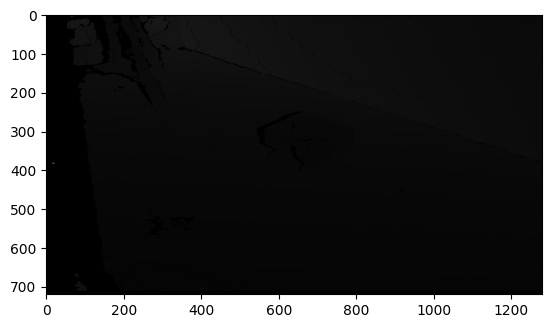

In [22]:
import cv2

 # Load depth projections from uint16 image
depth_image = cv2.imread('tmp/depth_image.png', cv2.IMREAD_ANYDEPTH)
projected_depths = np.float32(depth_image / 256.0)

print(f'{projected_depths.shape}')
print(f'Min: {np.min(projected_depths)}, Max: {np.max(projected_depths)}')
print(f'Mean: {np.mean(projected_depths)}, Std: {np.std(projected_depths)}')
print(f'Median: {np.median(projected_depths)}')
print(f'{projected_depths[400:410,400:410]}')

import matplotlib.pyplot as plt

plt.imshow(projected_depths, cmap='gray')

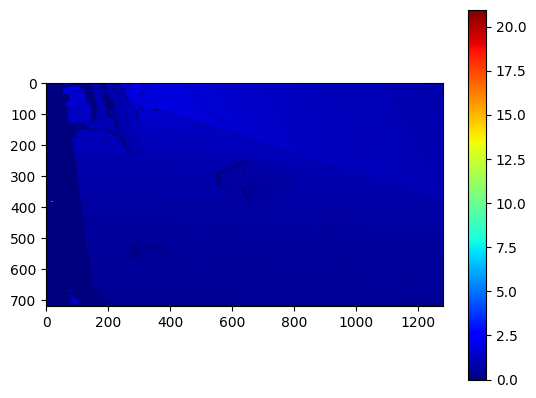

In [23]:
#convert map to better visualize
plt.imshow(projected_depths, cmap='jet')
plt.colorbar()

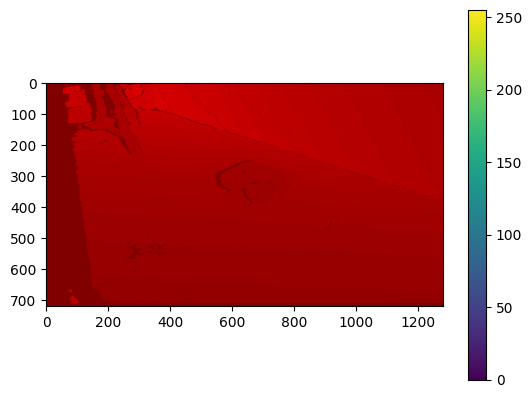

In [27]:
image_jet = cv2.applyColorMap(
                    np.uint8(projected_depths / np.amax(projected_depths) * 255),
                    cv2.COLORMAP_JET)
plt.imshow(image_jet)
plt.colorbar()

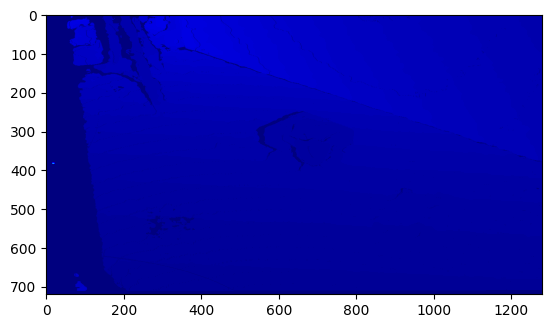

In [26]:
# convert to meters
projected_depths_m = projected_depths * 1000.0
# plot
plt.imshow(projected_depths_m, cmap='jet')